In [15]:
#!/usr/bin/env python sqiudpy env
# encoding: utf-8
#spot matrix reads num/cluster num/contact num plot

import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib as mpl
from concurrent import futures
from functools import partial
from tqdm import tqdm
mpl.rcParams['figure.dpi'] = 160
import yaml
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams["font.size"] = 12

out_dir='/home/goubo/CRICK/CRICK/spaceA/fig'
data_dir='/home/goubo/CRICK/CRICK/spaceA/SpatialSPRITE_res/Filter_Spot_v3'

os.makedirs(out_dir,exist_ok=True)
os.chdir(out_dir)

with open("/home/goubo/CRICK/CRICK/spaceA/config_v2.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
    
final_samples=['E11.5L1','E11.5L2','E12.5L5','E12.5L6',
               'E13.5C1','E13.5C4','E13.5C6','E14.5F5',
               'E14.5F6']

df_all_f='all_samples_spot_infor.csv'
df_f_all_f='all_samples_filtered_spot_infor.csv'

In [16]:
df_f_all=pd.read_csv(df_f_all_f)
df_f_all.groupby('sample')['Num of Clusters'].mean().sort_values(ascending= False)

sample
E12.5L6    15713.552546
E12.5L5    15642.516714
E14.5F6     6931.599627
E11.5L2     5493.185366
E14.5F5     4552.763043
E11.5L1     3520.510496
E13.5C1     2985.671018
E13.5C6     1888.729730
E13.5C4     1877.014765
Name: Num of Clusters, dtype: float64

In [17]:
df_f_all.groupby('sample')['Num of Reads'].mean().sort_values(ascending= False)

sample
E12.5L5    46155.768822
E12.5L6    40472.686031
E14.5F6    30368.999200
E13.5C1    27939.404204
E11.5L2    25861.511433
E11.5L1    17992.481107
E13.5C4    17162.338479
E13.5C6    16085.253438
E14.5F5    16039.488853
Name: Num of Reads, dtype: float64

In [18]:
df_f_all.groupby('sample')['Num of Contacts'].mean().sort_values(ascending= False)

sample
E13.5C1    3.969346e+07
E12.5L6    2.334912e+07
E12.5L5    2.011943e+07
E13.5C6    1.791368e+07
E13.5C4    1.682280e+07
E14.5F6    1.644953e+07
E11.5L2    1.507686e+07
E11.5L1    7.613318e+06
E14.5F5    4.362376e+06
Name: Num of Contacts, dtype: float64

In [19]:
df_f_all.groupby('sample')['Num of Contacts'].mean().mean()

17933396.738134854

/tmp/ipykernel_3240921/820741459.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_f_all,x='sample',y='log10_reads',palette=color_map,ax=axs[0])
/tmp/ipykernel_3240921/820741459.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_f_all,x='sample',y='log10_clusters',palette=color_map,ax=axs[1])
/tmp/ipykernel_3240921/820741459.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_f_all,x='sample',y='log10_contacts',palette=color_map,ax=axs[2])
/tmp/ipykernel_3240921/820741459.py:10: FutureWarning: 

Passing `p

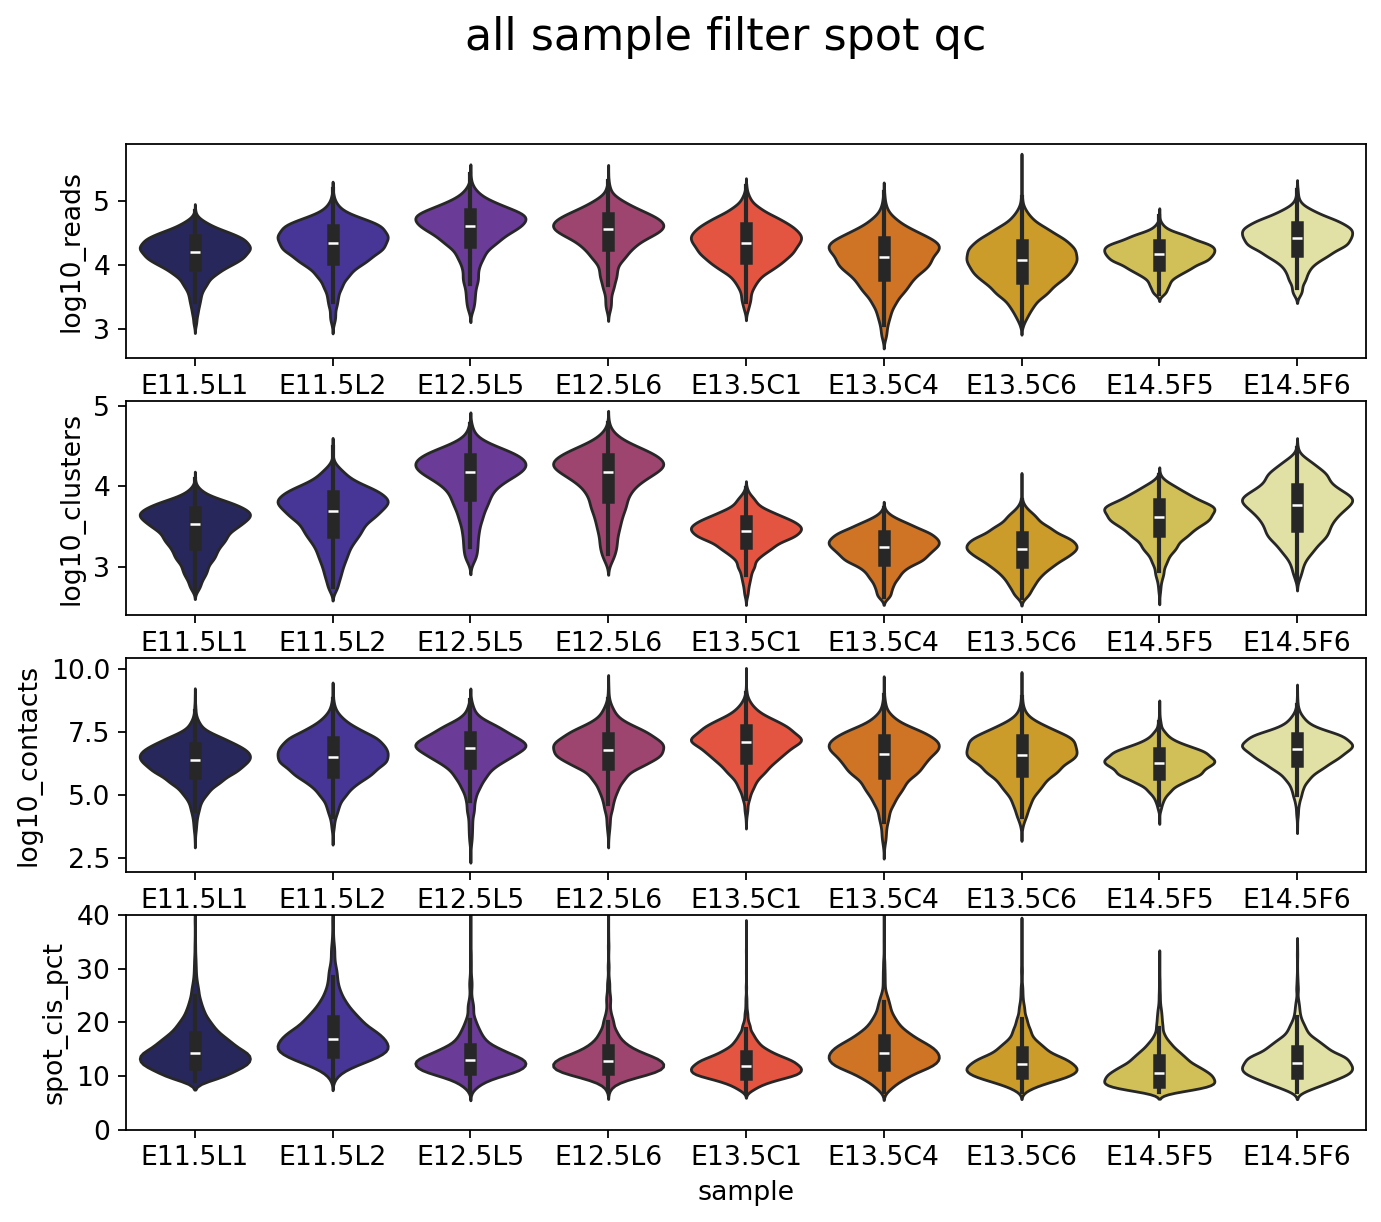

In [20]:
color_map=dict(zip(final_samples, sns.color_palette("CMRmap", n_colors=len(final_samples))))

fig, axs = plt.subplots(nrows=4, ncols=1,figsize=(10, 8))
sns.violinplot(data=df_f_all,x='sample',y='log10_reads',palette=color_map,ax=axs[0])
axs[0].tick_params(axis='x',rotation=0)
sns.violinplot(data=df_f_all,x='sample',y='log10_clusters',palette=color_map,ax=axs[1])
axs[1].tick_params(axis='x',rotation=0)
sns.violinplot(data=df_f_all,x='sample',y='log10_contacts',palette=color_map,ax=axs[2])
axs[2].tick_params(axis='x',rotation=0)
sns.violinplot(data=df_f_all,x='sample',y='spot_cis_pct',palette=color_map,ax=axs[3])
axs[3].tick_params(axis='x',rotation=0)
axs[3].set_ylim(0,40)
fig.suptitle('all sample filter spot qc', fontsize=20)
fig.savefig('all_sample_filter_spot_qc.pdf')

In [ ]:
import math

ncols = 3
nrows = math.ceil(len(final_samples) / ncols)
s_width = 3
s_height = 4

# -------------------- 数据加载 --------------------
data_dfs = {}          # 原始 spot_infor 数据
filtered_dfs = {}      # filtered_spot_infor 数据
df_all = pd.DataFrame()
df_f_all = pd.DataFrame()

for sample_name in tqdm(final_samples, desc='Loading data'):
    df = pd.read_csv(os.path.join(data_dir, f'{sample_name}_spot_infor.csv'))
    df_f = pd.read_csv(os.path.join(data_dir, f'{sample_name}_filtered_spot_infor.csv'))
    data_dfs[sample_name] = df
    filtered_dfs[sample_name] = df_f

    df['sample'] = sample_name
    df_f['sample'] = sample_name
    df_all = pd.concat([df_all, df], ignore_index=True)
    df_f_all = pd.concat([df_f_all, df_f], ignore_index=True)

df_all.to_csv(df_all_f, index=False)
df_f_all.to_csv(df_f_all_f, index=False)

# -------------------- 绘图函数辅助 --------------------
# 后续每个 Figure 独立绘制

# 1. spot raw
fig_spot_raw, axs_spot_raw = plt.subplots(nrows, ncols, figsize=(ncols*s_width, ncols*s_height))
for f, sample_name in enumerate(tqdm(final_samples, desc='spot_raw')):
    row, col = divmod(f, ncols)
    ax = axs_spot_raw[row, col]
    df = data_dfs[sample_name]
    cfg = config['spatial_infor'][sample_name]
    ax.scatter(df['x'], df['y'], color='blue', s=1, rasterized=True)
    if cfg['x_r']: ax.invert_xaxis()
    if not cfg['y_r']: ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_title(sample_name)
fig_spot_raw.suptitle('spot raw', fontsize=20)
# fig_spot_raw.tight_layout()
fig_spot_raw.savefig('spot_raw.pdf')
plt.close(fig_spot_raw)

# 2. num of reads
fig_reads, axs_reads = plt.subplots(nrows, ncols, figsize=(ncols*s_width, ncols*s_height))
sc_reads = None
for f, sample_name in enumerate(tqdm(final_samples, desc='num of reads')):
    row, col = divmod(f, ncols)
    ax = axs_reads[row, col]
    df = data_dfs[sample_name]
    cfg = config['spatial_infor'][sample_name]
    points = ax.scatter(df['x'], df['y'], c=df['Num of Reads'], cmap='Spectral_r', s=1, rasterized=True)
    if sc_reads is None: sc_reads = points
    if cfg['x_r']: ax.invert_xaxis()
    if not cfg['y_r']: ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_title(sample_name)
cbar = fig_reads.colorbar(sc_reads, ax=axs_reads, orientation='vertical', fraction=0.02, pad=0.1)
cbar.set_label('Num of Reads')
fig_reads.suptitle('num of reads', fontsize=20)
# fig_reads.tight_layout()
fig_reads.savefig('num_of_reads.pdf')
plt.close(fig_reads)

# 3. log1p reads
fig_log1p_reads, axs_log1p_reads = plt.subplots(nrows, ncols, figsize=(ncols*s_width, ncols*s_height))
sc_log1p_reads = None
for f, sample_name in enumerate(tqdm(final_samples, desc='log1p reads')):
    row, col = divmod(f, ncols)
    ax = axs_log1p_reads[row, col]
    df = data_dfs[sample_name]
    cfg = config['spatial_infor'][sample_name]
    points = ax.scatter(df['x'], df['y'], c=df['log1p_reads'], cmap='Spectral_r', s=1, rasterized=True)
    if sc_log1p_reads is None: sc_log1p_reads = points
    if cfg['x_r']: ax.invert_xaxis()
    if not cfg['y_r']: ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_title(sample_name)
cbar = fig_log1p_reads.colorbar(sc_log1p_reads, ax=axs_log1p_reads, orientation='vertical', fraction=0.02, pad=0.1)
cbar.set_label('log1p reads')
fig_log1p_reads.suptitle('log1p reads', fontsize=20)
# fig_log1p_reads.tight_layout()
fig_log1p_reads.savefig('log1p_reads.pdf')
plt.close(fig_log1p_reads)

# 4. filter reads spots
fig_filter_reads, axs_filter_reads = plt.subplots(nrows, ncols, figsize=(ncols*s_width, ncols*s_height))
for f, sample_name in enumerate(tqdm(final_samples, desc='filter reads')):
    row, col = divmod(f, ncols)
    ax = axs_filter_reads[row, col]
    df = data_dfs[sample_name]
    cfg = config['spatial_infor'][sample_name]
    min_val = cfg['min_log1p_reads']
    df_filt = df[df['log1p_reads'] > min_val]
    ax.scatter(df_filt['x'], df_filt['y'], color='blue', s=1, rasterized=True)
    if cfg['x_r']: ax.invert_xaxis()
    if not cfg['y_r']: ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_title(f'{sample_name}:{df_filt.shape[0]}')
fig_filter_reads.suptitle('filter reads spots', fontsize=20)
# fig_filter_reads.tight_layout()
fig_filter_reads.savefig('filter_reads_spots.pdf')
plt.close(fig_filter_reads)

# 5. num of contacts
fig_contacts, axs_contacts = plt.subplots(nrows, ncols, figsize=(ncols*s_width, ncols*s_height))
sc_contacts = None
for f, sample_name in enumerate(tqdm(final_samples, desc='num of contacts')):
    row, col = divmod(f, ncols)
    ax = axs_contacts[row, col]
    df = data_dfs[sample_name]
    cfg = config['spatial_infor'][sample_name]
    points = ax.scatter(df['x'], df['y'], c=df['Num of Contacts'], cmap='Spectral_r', s=1, rasterized=True)
    if sc_contacts is None: sc_contacts = points
    if cfg['x_r']: ax.invert_xaxis()
    if not cfg['y_r']: ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_title(sample_name)
cbar = fig_contacts.colorbar(sc_contacts, ax=axs_contacts, orientation='vertical', fraction=0.02, pad=0.1)
cbar.set_label('Num of Contacts')
fig_contacts.suptitle('num of contacts', fontsize=20)
# fig_contacts.tight_layout()
fig_contacts.savefig('num_of_contacts.pdf')
plt.close(fig_contacts)

# 6. log1p contacts
fig_log1p_contacts, axs_log1p_contacts = plt.subplots(nrows, ncols, figsize=(ncols*s_width, ncols*s_height))
sc_log1p_contacts = None
for f, sample_name in enumerate(tqdm(final_samples, desc='log1p contacts')):
    row, col = divmod(f, ncols)
    ax = axs_log1p_contacts[row, col]
    df = data_dfs[sample_name]
    cfg = config['spatial_infor'][sample_name]
    points = ax.scatter(df['x'], df['y'], c=df['log1p_contacts'], cmap='Spectral_r', s=1, rasterized=True)
    if sc_log1p_contacts is None: sc_log1p_contacts = points
    if cfg['x_r']: ax.invert_xaxis()
    if not cfg['y_r']: ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_title(sample_name)
cbar = fig_log1p_contacts.colorbar(sc_log1p_contacts, ax=axs_log1p_contacts, orientation='vertical', fraction=0.02, pad=0.1)
cbar.set_label('log1p contacts')
fig_log1p_contacts.suptitle('log1p contacts', fontsize=20)
# fig_log1p_contacts.tight_layout()
fig_log1p_contacts.savefig('log1p_contacts.pdf')
plt.close(fig_log1p_contacts)

# 7. filter contacts spots
fig_filter_contacts, axs_filter_contacts = plt.subplots(nrows, ncols, figsize=(ncols*s_width, ncols*s_height))
for f, sample_name in enumerate(tqdm(final_samples, desc='filter contacts')):
    row, col = divmod(f, ncols)
    ax = axs_filter_contacts[row, col]
    df = data_dfs[sample_name]
    cfg = config['spatial_infor'][sample_name]
    min_val = cfg['min_log1p_contacts']
    df_filt = df[df['log1p_contacts'] > min_val]
    ax.scatter(df_filt['x'], df_filt['y'], color='blue', s=1, rasterized=True)
    if cfg['x_r']: ax.invert_xaxis()
    if not cfg['y_r']: ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_title(f'{sample_name}:{df_filt.shape[0]}')
fig_filter_contacts.suptitle('filter contacts spots', fontsize=20)
# fig_filter_contacts.tight_layout()
fig_filter_contacts.savefig('filter_contacts_spots.pdf')
plt.close(fig_filter_contacts)

# 8. num of clusters
fig_clusters, axs_clusters = plt.subplots(nrows, ncols, figsize=(ncols*s_width, ncols*s_height))
sc_clusters = None
for f, sample_name in enumerate(tqdm(final_samples, desc='num of clusters')):
    row, col = divmod(f, ncols)
    ax = axs_clusters[row, col]
    df = data_dfs[sample_name]
    cfg = config['spatial_infor'][sample_name]
    points = ax.scatter(df['x'], df['y'], c=df['Num of Clusters'], cmap='Spectral_r', s=1, rasterized=True)
    if sc_clusters is None: sc_clusters = points
    if cfg['x_r']: ax.invert_xaxis()
    if not cfg['y_r']: ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_title(sample_name)
cbar = fig_clusters.colorbar(sc_clusters, ax=axs_clusters, orientation='vertical', fraction=0.02, pad=0.1)
cbar.set_label('Num of Clusters')
fig_clusters.suptitle('num of clusters', fontsize=20)
# fig_clusters.tight_layout()
fig_clusters.savefig('num_of_clusters.pdf')
plt.close(fig_clusters)

# 9. log1p clusters
fig_log1p_clusters, axs_log1p_clusters = plt.subplots(nrows, ncols, figsize=(ncols*s_width, ncols*s_height))
sc_log1p_clusters = None
for f, sample_name in enumerate(tqdm(final_samples, desc='log1p clusters')):
    row, col = divmod(f, ncols)
    ax = axs_log1p_clusters[row, col]
    df = data_dfs[sample_name]
    cfg = config['spatial_infor'][sample_name]
    points = ax.scatter(df['x'], df['y'], c=df['log1p_clusters'], cmap='Spectral_r', s=1, rasterized=True)
    if sc_log1p_clusters is None: sc_log1p_clusters = points
    if cfg['x_r']: ax.invert_xaxis()
    if not cfg['y_r']: ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_title(sample_name)
cbar = fig_log1p_clusters.colorbar(sc_log1p_clusters, ax=axs_log1p_clusters, orientation='vertical', fraction=0.02, pad=0.1)
cbar.set_label('log1p clusters')
fig_log1p_clusters.suptitle('log1p clusters', fontsize=20)
# fig_log1p_clusters.tight_layout()
fig_log1p_clusters.savefig('log1p_clusters.pdf')
plt.close(fig_log1p_clusters)

# 10. filter clusters spots
fig_filter_clusters, axs_filter_clusters = plt.subplots(nrows, ncols, figsize=(ncols*s_width, ncols*s_height))
for f, sample_name in enumerate(tqdm(final_samples, desc='filter clusters')):
    row, col = divmod(f, ncols)
    ax = axs_filter_clusters[row, col]
    df = data_dfs[sample_name]
    cfg = config['spatial_infor'][sample_name]
    min_val = cfg['min_log1p_clusters']
    df_filt = df[df['log1p_clusters'] > min_val]
    ax.scatter(df_filt['x'], df_filt['y'], color='blue', s=1, rasterized=True)
    if cfg['x_r']: ax.invert_xaxis()
    if not cfg['y_r']: ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_title(f'{sample_name}:{df_filt.shape[0]}')
fig_filter_clusters.suptitle('filter clusters spots', fontsize=20)
# fig_filter_clusters.tight_layout()
fig_filter_clusters.savefig('filter_clusters_spots.pdf')
plt.close(fig_filter_clusters)

# 11. spot cis pct
fig_cis_pct, axs_cis_pct = plt.subplots(nrows, ncols, figsize=(ncols*s_width, ncols*s_height))
sc_cis_pct = None
for f, sample_name in enumerate(tqdm(final_samples, desc='spot cis pct')):
    row, col = divmod(f, ncols)
    ax = axs_cis_pct[row, col]
    df = data_dfs[sample_name]
    cfg = config['spatial_infor'][sample_name]
    points = ax.scatter(df['x'], df['y'], c=df['spot_cis_pct'], cmap='Spectral_r', s=1, rasterized=True)
    if sc_cis_pct is None: sc_cis_pct = points
    if cfg['x_r']: ax.invert_xaxis()
    if not cfg['y_r']: ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_title(sample_name)
cbar = fig_cis_pct.colorbar(sc_cis_pct, ax=axs_cis_pct, orientation='vertical', fraction=0.02, pad=0.1)
cbar.set_label('spot cis pct')
fig_cis_pct.suptitle('spot cis pct', fontsize=20)
# fig_cis_pct.tight_layout()
fig_cis_pct.savefig('spot_cis_pct.pdf')
plt.close(fig_cis_pct)

# 12. filter cis pct spots
fig_filter_cis_pct, axs_filter_cis_pct = plt.subplots(nrows, ncols, figsize=(ncols*s_width, ncols*s_height))
for f, sample_name in enumerate(tqdm(final_samples, desc='filter cis pct')):
    row, col = divmod(f, ncols)
    ax = axs_filter_cis_pct[row, col]
    df = data_dfs[sample_name]
    cfg = config['spatial_infor'][sample_name]
    min_val = cfg['min_spot_cis_pct']
    df_filt = df[df['spot_cis_pct'] > min_val]
    ax.scatter(df_filt['x'], df_filt['y'], color='blue', s=1, rasterized=True)
    if cfg['x_r']: ax.invert_xaxis()
    if not cfg['y_r']: ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_title(f'{sample_name}:{df_filt.shape[0]}')
fig_filter_cis_pct.suptitle('filter spot cis pct spots', fontsize=20)
# fig_filter_cis_pct.tight_layout()
fig_filter_cis_pct.savefig('filter_spot_cis_pct_spots.pdf')
plt.close(fig_filter_cis_pct)

# 13. density plots (保留 kdeplot，不加 colorbar)
fig_den_reads, axs_den_reads = plt.subplots(nrows, ncols, figsize=(ncols*s_width, ncols*s_height))
for f, sample_name in enumerate(tqdm(final_samples, desc='den reads')):
    row, col = divmod(f, ncols)
    ax = axs_den_reads[row, col]
    df = data_dfs[sample_name]
    cfg = config['spatial_infor'][sample_name]
    min_val = cfg['min_log1p_reads']
    sns.kdeplot(data=df, x='log1p_reads', ax=ax)
    ax.vlines(min_val, 0, ax.get_ylim()[1], colors='r', linestyles='dashed', label='min_log1p_reads')
    ax.set_title(sample_name)
fig_den_reads.suptitle('log1p reads density', fontsize=20)
# fig_den_reads.tight_layout()
fig_den_reads.savefig('log1p_reads_density.pdf')
plt.close(fig_den_reads)

fig_den_contacts, axs_den_contacts = plt.subplots(nrows, ncols, figsize=(ncols*s_width, ncols*s_height))
for f, sample_name in enumerate(tqdm(final_samples, desc='den contacts')):
    row, col = divmod(f, ncols)
    ax = axs_den_contacts[row, col]
    df = data_dfs[sample_name]
    cfg = config['spatial_infor'][sample_name]
    min_val = cfg['min_log1p_contacts']
    sns.kdeplot(data=df, x='log1p_contacts', ax=ax)
    ax.vlines(min_val, 0, ax.get_ylim()[1], colors='r', linestyles='dashed', label='min_log1p_contacts')
    ax.set_title(sample_name)
fig_den_contacts.suptitle('log1p contacts density', fontsize=20)
# fig_den_contacts.tight_layout()
fig_den_contacts.savefig('log1p_contacts_density.pdf')
plt.close(fig_den_contacts)

fig_den_clusters, axs_den_clusters = plt.subplots(nrows, ncols, figsize=(ncols*s_width, ncols*s_height))
for f, sample_name in enumerate(tqdm(final_samples, desc='den clusters')):
    row, col = divmod(f, ncols)
    ax = axs_den_clusters[row, col]
    df = data_dfs[sample_name]
    cfg = config['spatial_infor'][sample_name]
    min_val = cfg['min_log1p_clusters']
    sns.kdeplot(data=df, x='log1p_clusters', ax=ax)
    ax.vlines(min_val, 0, ax.get_ylim()[1], colors='r', linestyles='dashed', label='min_log1p_clusters')
    ax.set_title(sample_name)
fig_den_clusters.suptitle('log1p clusters density', fontsize=20)
# fig_den_clusters.tight_layout()
fig_den_clusters.savefig('log1p_clusters_density.pdf')
plt.close(fig_den_clusters)

fig_den_spot_cis_pct, axs_den_spot_cis_pct = plt.subplots(nrows, ncols, figsize=(ncols*s_width, ncols*s_height))
for f, sample_name in enumerate(tqdm(final_samples, desc='den cis pct')):
    row, col = divmod(f, ncols)
    ax = axs_den_spot_cis_pct[row, col]
    df = data_dfs[sample_name]
    cfg = config['spatial_infor'][sample_name]
    min_val = cfg['min_spot_cis_pct']
    sns.kdeplot(data=df, x='spot_cis_pct', ax=ax)
    ax.vlines(min_val, 0, ax.get_ylim()[1], colors='r', linestyles='dashed', label='min_spot_cis_pct')
    ax.set_xlim(0, 100)
    ax.set_title(sample_name)
fig_den_spot_cis_pct.suptitle('spot cis pct density', fontsize=20)
# fig_den_spot_cis_pct.tight_layout()
fig_den_spot_cis_pct.savefig('spot_cis_pct_density.pdf')
plt.close(fig_den_spot_cis_pct)

# 14. final spots (使用 filtered_dfs)
fig_filters, axs_filters = plt.subplots(nrows, ncols, figsize=(ncols*s_width, ncols*s_height))
for f, sample_name in enumerate(tqdm(final_samples, desc='final spots')):
    row, col = divmod(f, ncols)
    ax = axs_filters[row, col]
    df_f = filtered_dfs[sample_name]
    cfg = config['spatial_infor'][sample_name]
    ax.scatter(df_f['x'], df_f['y'], color='blue', s=1, rasterized=True)
    if cfg['x_r']: ax.invert_xaxis()
    if not cfg['y_r']: ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_title(f'{sample_name}:{df_f.shape[0]}')
fig_filters.suptitle('final spots', fontsize=20)
# fig_filters.tight_layout()
fig_filters.savefig('final_spots.pdf')
plt.close(fig_filters)

num of reads: 100%|██████████| 9/9 [00:00<00:00, 214.84it/s]
/tmp/ipykernel_3240921/735317713.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig_reads.tight_layout()
log1p reads: 100%|██████████| 9/9 [00:00<00:00, 227.45it/s]
/tmp/ipykernel_3240921/735317713.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig_log1p_reads.tight_layout()
num of contacts: 100%|██████████| 9/9 [00:00<00:00, 231.51it/s]
/tmp/ipykernel_3240921/735317713.py:126: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig_contacts.tight_layout()
log1p contacts: 100%|██████████| 9/9 [00:00<00:00, 197.54it/s]
/tmp/ipykernel_3240921/735317713.py:147: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig_log1p_contacts.tight_layout()
num of clust